# Introdución a Tensorflow y Keras

Referencias:

- [Introducción a TensorFlow y Keras: Fundamentos y ejemplos](https://openwebinars.net/blog/tensorflow-keras-fundamentos/). OpenWebinars.
- [Introducción a las redes de memoria a corto-largo plazo (LSTM)](https://la.mathworks.com/discovery/lstm.html). MathWorks.
- [What Is a Recurrent Neural Network (RNN)?](https://la.mathworks.com/discovery/rnn.html). MathWorks.

Otras referencias relacionadas sobre `scikit-learn`:

- `scikit-learn` se centra en aprendizaje automático tradicional que no está basado en redes neuronales profundas.
- Se puede utilizar para preprocesar los datos antes de entrenar modelos en TensorFlow.
- [Tutoriales de `scikit-learn`](https://qu4nt.github.io/sklearn-doc-es/tutorial/index.html).
- [Manual de usuario de `scikit-learn`](https://qu4nt.github.io/sklearn-doc-es/user_guide.html).

Libros:

- [Deep Learning with TensorFlow and Keras (3rd edition). Published by Packt](https://github.com/PacktPublishing/Deep-Learning-with-TensorFlow-and-Keras-3rd-edition).
- [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow (3rd edition)](https://github.com/ageron/handson-ml3).
- [Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2 (3rd Edition)](https://github.com/rasbt/python-machine-learning-book-3rd-edition).
- [TensorFlow 2 Pocket Reference: Building and Deploying Machine Learning Models](https://github.com/rasbt/python-machine-learning-book-3rd-edition).

## 1. Instalación de Tensorflow 2

- Necesitará un versión de Python que esté entre la **3.8 y [3.11](https://www.python.org/downloads/release/python-3119/)**.
- Cuando trabaje en su equipo de forma local se recomienda el uso [**entornos virtuales** con `virtualenv`](https://josejuansanchez.org/python-for-java-developers/#_entornos_virtuales).
- Descarga e instala el paquete de `tensorflow` con `pip`.



In [5]:
!pip install tensorflow

## 2. Ejemplo de creación de un modelo LSTM

En este ejemplo vamos a construir un modelo **LSTM (_Long Short-Term Memory_)** para un Chatbot que será capaz de analizar una frase de un cliente y clasificarla en uno de las siguientes categorías:

- AYUDA
- OK
- SERVICIO_TECNICO


Los pasos que vamos a seguir son:

- Cargar un _dataset_ con los datos de entrenamiento. En nuestro caso será un archivo de texto.
- Construir un modelo de una red reuronal de tipo LSTM capaz de analizar texto.
- Entrenar la red neuronal.
- Evaluar la precisión del modelo.

### 2.1 Datos de entrenamiento

El archivo de texto que vamos a utilizar contiene frases con el siguiente formato:

```
Frase : CATEGORÍA
```

Ejemplo:


```
No tengo idea de qué hacer, necesito orientación : AYUDA
El equipo está funcionando sin problemas : OK
Necesito que un profesional venga a mi casa para inspeccionar el equipo : SERVICIO_TECNICO
```


## 2.2 Entrenamiento del modelo


Epoch 1/12
662/662 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6468 - loss: 0.9645
Epoch 2/12
662/662 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9755 - loss: 0.2156
Epoch 3/12
662/662 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9863 - loss: 0.0921
Epoch 4/12
662/662 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9935 - loss: 0.0485
Epoch 5/12
662/662 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9992 - loss: 0.0207
Epoch 6/12
662/662 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 1.0000 - loss: 0.0103
Epoch 7/12
662/662 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 1.0000 - loss: 0.0077
Epoch 8/12
662/662 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 1.0000 - loss: 0.0049
Epoch 9/12
662/662 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 1.0000 - loss: 0.0031
Epoch 10/12
662/662 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 11/12
662/662 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 12/12
662/662 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/ste

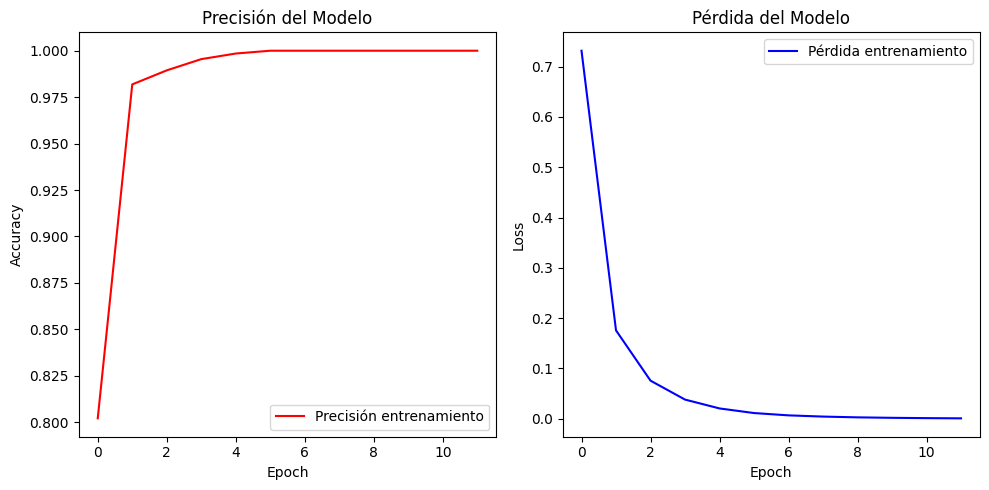

In [26]:
import tensorflow as tf
import numpy as np
import json
import matplotlib.pyplot as plt

"""
Función para cargar los datos de entrenamiento.
Esta función lee los datos de entrenamiento desde un archivo de texto
los almacena en dos listas: preguntas y respuestas, que luego devuevle
"""
def cargar_datos(nombre_archivo):
  preguntas = []
  respuestas = []
  with open(nombre_archivo, 'r') as file:
    #i = 1
    for line in file:
      pregunta, respuesta = line.strip().split(' : ')
      preguntas.append(pregunta)
      respuestas.append(respuesta)
      #print(f"{i} - {line}")
      #i += 1
  return preguntas, respuestas

"""
Función para preprocesar los datos.
Convierte las palabras en símbolos, para poder trabajar con ellas.
"""
def preprocesar_datos(preguntas, respuestas):
    # Creamos una capa de TextVectorization de TensorFlow, que nos ayuda
    # a convertir texto en representaciones numéricas (vectores o tokens).
    tokenizer = tf.keras.layers.TextVectorization()

    # El tokenizer "aprende" el vocabulario que se usa en las preguntas,
    # analiza su frecuencia y crea un mapeo único de palabras/tokens a índices numéricos.
    tokenizer.adapt(preguntas)

    # Las preguntas se convierten en secuencias numéricas usando el vocabulario aprendido.
    # Por ejemplo: "¿Cómo estás?" podría transformarse en [3, 15].
    x_train = tokenizer(preguntas)

    # Las respuestas se convierten en un array de NumPy, que es necesario
    # para la compatibilidad con TensorFlow/Keras durante el entrenamiento.
    y_train = np.array(respuestas)

    return x_train, y_train, tokenizer


"""
Función para construir el modelo LSTM (Long Short-Term Memory).
Este modelo está diseñado para procesar texto y clasificarlo en categorías.

El modelo es una red secuencial (Sequential) con tres capas clave:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(...),  # Capa 1: Embedding
    tf.keras.layers.LSTM(4),         # Capa 2: LSTM
    tf.keras.layers.Dense(3, ...)    # Capa 3: Salida
])

- Capa 1:
Convierte tokens numéricos (ej: [1, 14, 3]) en vectores densos de tamaño fijo.

- Capa 2:
Procesa secuencias de embeddings para capturar dependencias temporales como contexto en texto).
El número de unidades/células LSTM determina la capacidad de aprendizaje del modelo.
En este ejemplo se han utilizado 4 unidades/células.
Aumentar este valor (Ejemplo: 64) puede mejorar la capacidad del modelo,
pero requiere más datos para evitar overfitting.

- Capa 3:
Clasifica la secuencia en una de las 3 clases (definidas por num_clases).
"""
def construir_modelo(tokenizer, num_clases):
  # El modelo es una red secuencial (Sequential) con tres capas.
  model = tf.keras.Sequential([
      tf.keras.layers.Embedding(input_dim=len(tokenizer.get_vocabulary()) + 1, output_dim=4,  mask_zero=True),
      tf.keras.layers.LSTM(4), # La modificación de este parámetro redunda en la "inteligencia" del modelo
      tf.keras.layers.Dense(num_clases, activation='softmax')
  ])

  # Compilación del modelo.
  # Elegimos una función de pérdida (loss): sparse_categorical_crossentropy (adecuada para clases enteras, como 0, 1, 2).
  # Elegimos un optimizador (optimizer): adam (eficiente y popular para entrenamiento).
  # Métrica: accuracy (porcentaje de predicciones correctas).
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

"""
Función para entrenar el modelo.
- epoch: Es un ciclo completo de entrenamiento, donde el modelo ve todas las muestras del dataset una vez.
  El número de epochs se determina mediante validación (Ej: cuando la pérdida en la validación deja de mejorar).

- batch_size: Define cuántas muestras se procesan antes de actualizar los pesos del modelo.
  Podemos decir que controla lo fino del entrenamiento.

  Los valores de epoch y batch_size son responsables de que el entrenamiento tarde más o menos.

- verbose: Es la cantidad de información que muestra durante el entrenamiento
"""
def entrenar_modelo(model, x_train, y_train):
  history = model.fit(x_train, y_train, epochs=12, batch_size=1, verbose=True)
  return history    # Devolvemos el historial del entrenamiento

"""
Función para convertir las etiquetas de las categorías en índices.
Entrada:   etiquetas = {"OK": 0, "AYUDA": 1, "SERVICIO_TECNICO": 2}
           y_train = ["SERVICIO_TECNICO", "OK", "AYUDA", "OK", "AYDUDA", ...]
Salida:    y = [2, 0, 1, 0, 1, ...]
"""
def mapear_etiquetas_a_indices(y_train, etiquetas):
    # Convertimos las etiquetas de las categorías en índices
    y = [etiquetas[label] for label in y_train]

    # Convertimos la lista de enteros en un tensor de TensorFlow
    y = tf.convert_to_tensor(y, dtype=tf.int64)

    return y

"""
Función para mostrar el rendimiento del entrenamiento del modelo.

Entrada: El objeto `history` que contiene el registro de métricas por época.
"""
def mostrar_grafica_precision_perdida(history):
  plt.figure(figsize=(10, 5))

  # Gráfica de precisión
  # Creamos un gráfico de 1 fila, 2 columnas y ocupará la posición 1
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], 'r', label='Precisión entrenamiento') # r: red
  plt.title('Precisión del Modelo')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend()

  # Gráfica de pérdida
  # Creamos un gráfico de 1 fila, 2 columnas y ocupará la posición 2
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], 'b', label='Pérdida entrenamiento')   # b: blue
  plt.title('Pérdida del Modelo')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend()

  # Autoajusta el espacio entre subgráficos
  plt.tight_layout()

  # Renderiza y muestra la figura
  plt.show()

# Programa Principal
if __name__ == "__main__":
    # Paso 1. Cargamos los datos de entrenamiento
    archivo_entrenamiento = "tsetdesordenado.txt"
    preguntas, respuestas = cargar_datos(archivo_entrenamiento)
    x_train, y_train, tokenizer = preprocesar_datos(preguntas, respuestas)

    # Convertimos el texto de las categorías de la lista y_train en índices.
    etiquetas = {"OK": 0, "AYUDA": 1, "SERVICIO_TECNICO": 2}
    y = mapear_etiquetas_a_indices(y_train, etiquetas)

    # Convertimos la lista de respuestas en un set para eliminar los elementos repetidos
    # Una vez que eliminamos los elementos repetidos contamos cuántos tipos hay.
    num_clases = len(set(respuestas))

    # Paso 2. Construimos el modelo
    model = construir_modelo(tokenizer, num_clases)

    # Paso 3. Entrenamos el modelo
    history = entrenar_modelo(model,  x_train, y)

    # Paso 4. Mostramos una gráfica con la precisión y pérdida del entrenamiento
    mostrar_grafica_precision_perdida(history)

    # Paso 5. Guardamos el modelo entrenado en formato Keras (o .h5)
    model.save("modelo.keras")

    # Paso 6. Guardamos el vocabulario del tokenizer
    vocabulary = tokenizer.get_vocabulary()
    with open("vocabulary.txt", "w") as f:
        for word in vocabulary:
            f.write(f"{word}\n")

    # Paso 7. Guardamos el mapeo de etiquetas en un archivo
    with open("etiquetas.json", "w") as f:
        json.dump(etiquetas, f)

## 2.3 Evaluación del modelo

En este ejemplo utilizaremos el modelo que hemos entrenado en el paso anterior y lo evaluaremos analizando las oraciones que se introduzcan por teclado.

In [ ]:
import tensorflow as tf
import numpy as np
import json

# 1. Cargar el modelo
model = tf.keras.models.load_model("modelo.keras")

# 2. Cargar el vocabulario del tokenizer
with open("vocabulary.txt", "r") as f:
    vocabulary = [line.strip() for line in f]

# 3. Crear el tokenizer y asignar el vocabulario
tokenizer = tf.keras.layers.TextVectorization()
tokenizer.set_vocabulary(vocabulary)

# 4. Cargar el mapeo de etiquetas
with open("etiquetas.json", "r") as f:
    etiquetas = json.load(f)
    # Invertir el mapeo (de índice a etiqueta)
    index_to_label = {v: k for k, v in etiquetas.items()}

# 5. Bucle interactivo
print("Chatbot: ¡Hola! Escribe 'salir' para terminar.")
while True:
    entrada = input("Tú: ")
    if entrada.lower() == "salir":
        break

    # Preprocesar y predecir
    texto_preprocesado = tokenizer([entrada])
    prediccion = model.predict(texto_preprocesado)
    indice = np.argmax(prediccion[0])  # Obtener el índice de mayor probabilidad

    # Obtener la etiqueta correspondiente
    etiqueta = index_to_label.get(indice, "NO ENTIENDO")
    print(f"Chatbot: {etiqueta}")


## 2.4 Evaluamos el modelo y actualizamos el archivo de entrenamiento

En el siguiente ejemplo después de predecir la categoría de la pregunta se le pregunta al usuario si la predicción ha sido correcta o no. En el caso de que la predicción sea correcta se añadirá la pregunta al archivo del _dataset_ de entrenamiento.

In [ ]:
import tensorflow as tf
import numpy as np
import json

# 1. Cargar el modelo
model = tf.keras.models.load_model("modelo.keras")

# 2. Cargar el vocabulario del tokenizer
with open("vocabulary.txt", "r") as f:
    vocabulary = [line.strip() for line in f]

# 3. Crear el tokenizer y asignar el vocabulario
tokenizer = tf.keras.layers.TextVectorization()
tokenizer.set_vocabulary(vocabulary)

# 4. Cargar el mapeo de etiquetas
with open("etiquetas.json", "r") as f:
    etiquetas = json.load(f)
    # Invertir el mapeo (de índice a etiqueta)
    index_to_label = {v: k for k, v in etiquetas.items()}

# 5. Bucle interactivo
print("Chatbot: ¡Hola! Escribe 'salir' para terminar.")
while True:
    entrada = input("Tú: ")
    if entrada.lower() == "salir":
        break

    # Preprocesar y predecir
    texto_preprocesado = tokenizer([entrada])
    prediccion = model.predict(texto_preprocesado)
    indice = np.argmax(prediccion[0])  # Obtener el índice de mayor probabilidad

    # Obtener la etiqueta correspondiente
    etiqueta = index_to_label.get(indice, "NO ENTIENDO")
    print(f"Chatbot: {etiqueta}")

    valido = input("¿Correcto? (S/N)")

    if valido.lower() == "s":
      # Nombre del archivo de texto donde están los datos de entrenamiento
      nombre_archivo = "tsetdesordenado.txt"

      # Abre el archivo en modo de escritura (append) para añadir contenido al final
      with open(nombre_archivo, "a") as archivo:
          # Escribe PREGUNTA, " : ", y CATEGORIA al final del archivo
          archivo.write(f"\n{entrada} : {etiqueta}")



## 2.5 Función auxiliar

Esta función nos ayuda a desordenar las líneas del archivo de datos de entrenamiento.

In [9]:
import random

def barajar_lineas_archivo(input_file, output_file):
    """
    Baraja las líneas de un archivo de entrada y las guarda en un archivo de salida.

    Parámetros:
    input_file (str): Ruta del archivo de entrada
    output_file (str): Ruta del archivo de salida
    """
    # Leer todas las líneas del archivo de entrada
    with open(input_file, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # Barajar las líneas
    random.shuffle(lines)

    # Escribir las líneas barajadas en el archivo de salida
    with open(output_file, 'w', encoding='utf-8') as file:
        file.writelines(lines)

In [19]:
barajar_lineas_archivo("tset.txt", "tsetdesordenado.txt")